

*  Qingqing Song, Tianchu Xie

Grover’s Algorithm for Graph Coloring Challenge



In [1]:
# Imports!
# !pip install qiskit
import numpy as np
from qiskit import QuantumCircuit, execute, transpile, Aer, IBMQ
from qiskit.visualization import *
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, IBMQ, execute


In [3]:
# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

In [37]:
# clause_list = [[0,1],
#                [0,2],
#                [1,3],
#                [2,3]]
# num_city = 4

# clause_list = [[0,1],
#                [0,3],
#                [1,2],
#                [1,4],
#                [2,5],
#                [3,4],
#                [4,5]]
# num_city = 6

clause_list = [[0,1],
               [0,3],
               [1,2],
               [1,4],
               [2,5],
               [3,4],
               [4,5],
               [3,6],
               [6,7],
               [4,7]]
num_city = 8

In [38]:
def XOR(qc, a, b, output):
    qc.cx(a, output)
    qc.cx(b, output)

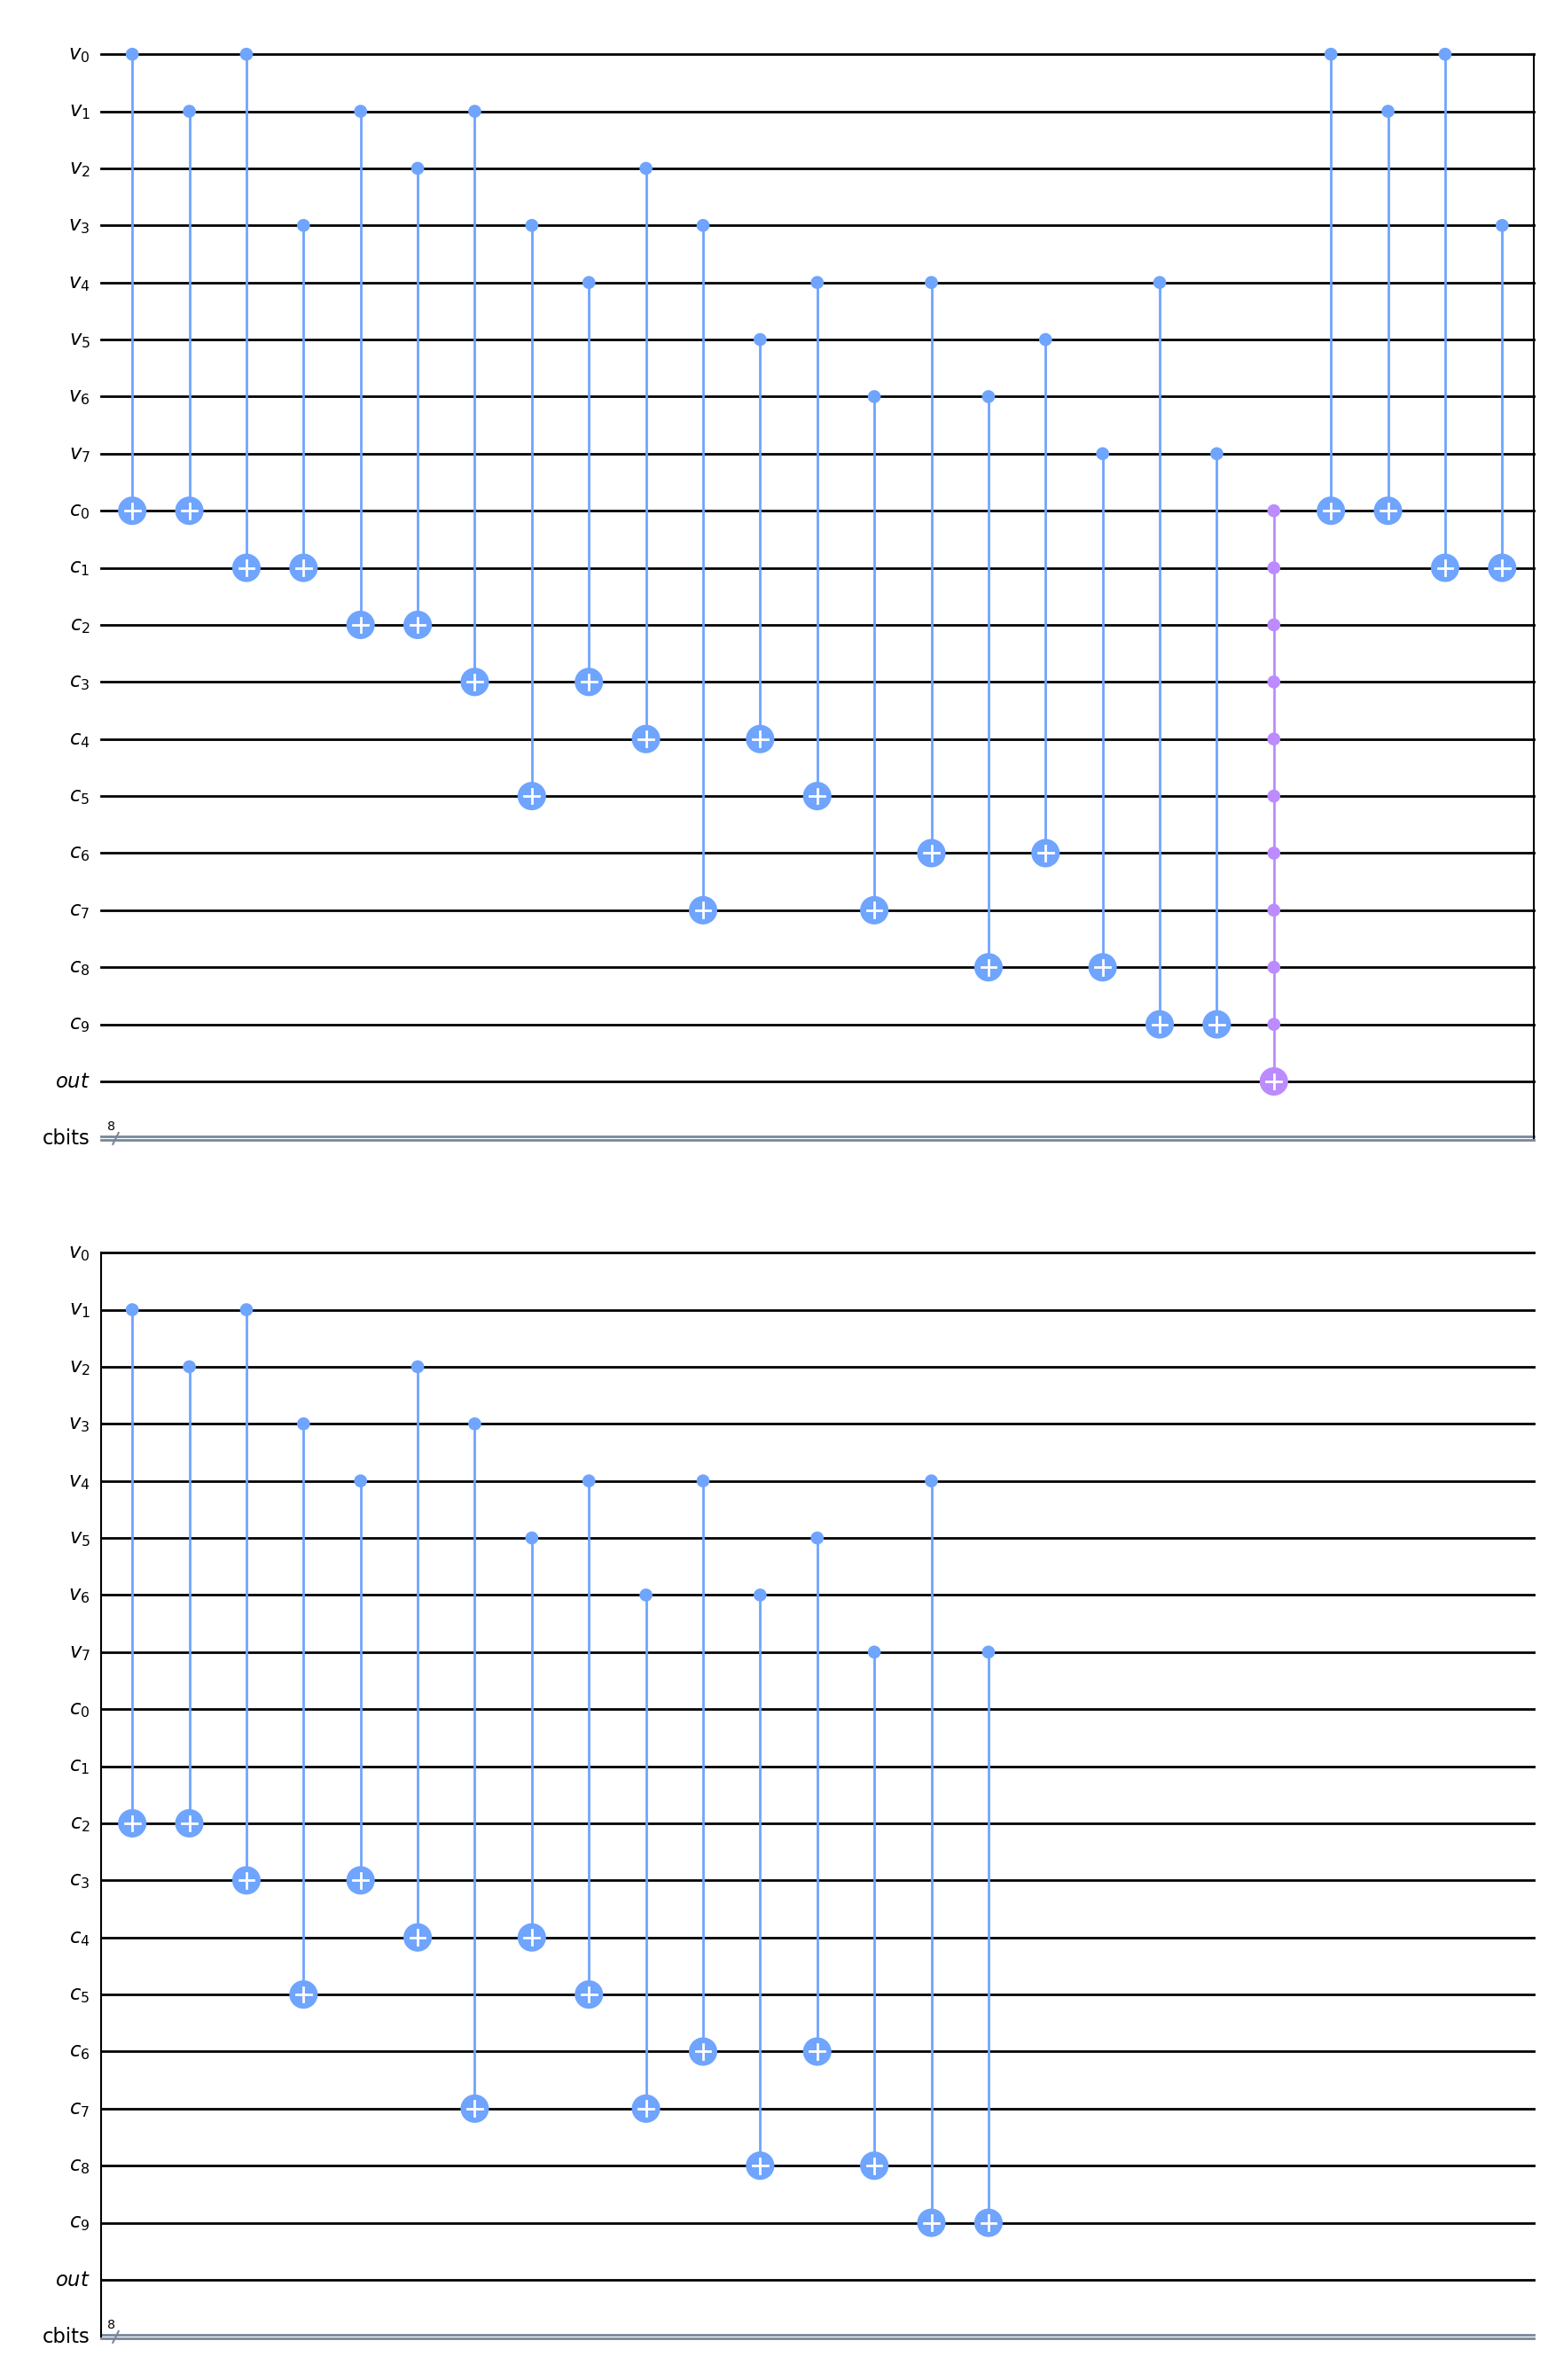

In [39]:
var_qubits = QuantumRegister(num_city, name='v')
clause_qubits = QuantumRegister(len(clause_list), name='c')
output_qubit = QuantumRegister(1, name='out')
cbits = ClassicalRegister(num_city, name='cbits')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit, cbits)

def cityColor_oracle(qc, clause_list, clause_qubits):
    # Compute clauses
    i = 0
    for clause in clause_list:
        XOR(qc, clause[0], clause[1], clause_qubits[i])
        i += 1

    # Flip 'output' bit if all clauses are satisfied
    qc.mct(clause_qubits, output_qubit)

    # Uncompute clauses to reset clause-checking bits to 0
    i = 0
    for clause in clause_list:
        XOR(qc, clause[0], clause[1], clause_qubits[i])
        i += 1

cityColor_oracle(qc, clause_list, clause_qubits)
qc.draw('mpl')

In [40]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

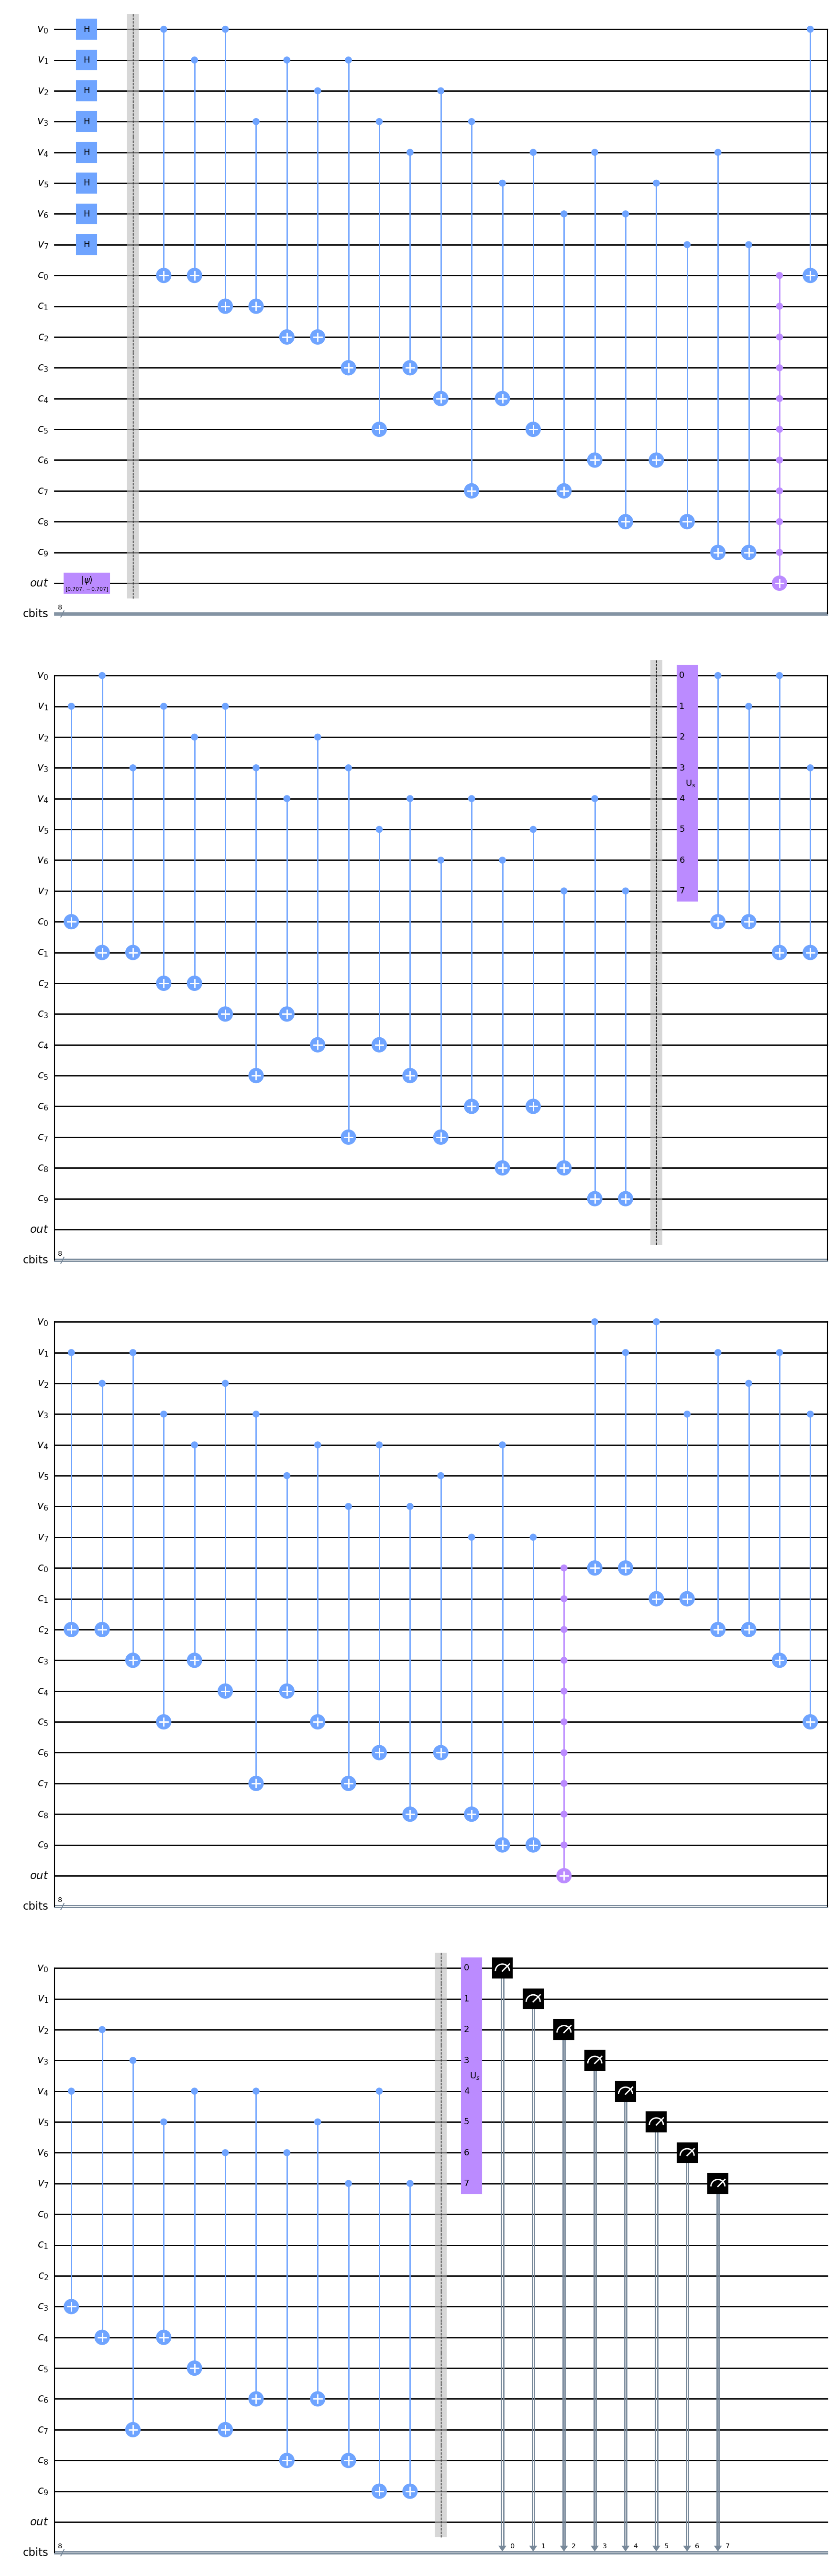

In [41]:
var_qubits = QuantumRegister(num_city, name='v')
clause_qubits = QuantumRegister(len(clause_list), name='c')
output_qubit = QuantumRegister(1, name='out')
cbits = ClassicalRegister(num_city, name='cbits')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit, cbits)

# Initialize 'out0' in state |->
qc.initialize([1, -1]/np.sqrt(2), output_qubit)

# Initialize qubits in state |s>
qc.h(var_qubits)
qc.barrier()  # for visual separation

## First Iteration
# Apply our oracle
cityColor_oracle(qc, clause_list, clause_qubits)
qc.barrier()  # for visual separation
# Apply our diffuser
qc.append(diffuser(num_city), list(range(num_city)))

## Second Iteration
cityColor_oracle(qc, clause_list, clause_qubits)
qc.barrier()  # for visual separation
# Apply our diffuser
qc.append(diffuser(num_city), list(range(num_city)))

# Measure the variable qubits
qc.measure(var_qubits, cbits)

qc.draw('mpl')

In [42]:
# Setting up and running the QASM simulator.
backend = Aer.get_backend('qasm_simulator') # Choosing the simulator we want to use
job = execute(qc, backend, shots = 1024) # Running the simulator - specifying the circuit we want to simulate and the number of times we want to simulate it (shots)
result = job.result() # Getting the result from the simulator

In [34]:
print(result)

Result(backend_name='qasm_simulator', backend_version='0.12.0', qobj_id='', job_id='1f3905bb-872f-4e63-97ef-c0472d5ac395', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3f': 17, '0x36': 12, '0x6': 15, '0x23': 18, '0x2d': 9, '0x33': 17, '0x14': 20, '0x1a': 13, '0x2b': 13, '0x32': 20, '0x3e': 17, '0x20': 12, '0x4': 17, '0x18': 21, '0x2e': 22, '0x34': 19, '0x1': 11, '0x25': 10, '0x3b': 16, '0x1e': 24, '0xc': 14, '0x28': 20, '0xa': 18, '0x1c': 11, '0x2f': 18, '0x8': 12, '0x3a': 17, '0x3c': 14, '0x10': 14, '0x26': 15, '0x35': 20, '0xf': 10, '0x1b': 13, '0xb': 12, '0x9': 14, '0x30': 20, '0x12': 11, '0x0': 11, '0x5': 17, '0x31': 13, '0x1d': 15, '0x19': 14, '0x37': 24, '0x13': 10, '0xe': 25, '0x24': 23, '0x29': 12, '0x3': 15, '0x11': 19, '0x16': 22, '0x17': 20, '0xd': 8, '0x2c': 6, '0x27': 13, '0x3d': 16, '0x38': 16, '0x2': 24, '0x7': 20, '0x2a': 14, '0x39': 25, '0x21': 13, '0x15': 14, '0x1f': 23, '0x22': 16}), header=QobjE

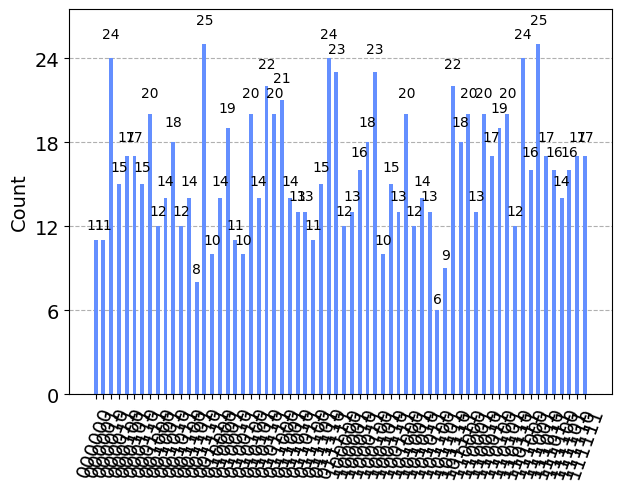

In [35]:
counts = result.get_counts() 
plot_histogram(counts)